# Table of contents
1. [Introduction](#introduction)
    1. [Description of Data](#data_description)
2. [Loading Images](#loadingimages1)
    1. [Self Drawn Images](#loadingimages2)
    2. [Other Images](#loadingimages3)
3. [Preparing Images](#prepare1)
    1. [Working on a Single Image](#prepare2)
    2. [Working on the Whole Dataset](#prepare3)
    3. [Merging Datasets](#prepare4)
4. [Transforming Images into Numerical Data](#imagedata1)
5. [Exploratory Data Analysis (EDA)](#eda1)
    1. [Checking for Missing Data or Empty Images](#eda2)
        1. [Imputing a New Image](#missing1)
    2. [Outliers](#eda3)
        1. [Checking for Outliers](#outlier1)
        2. [Checking Correct Label for Outlier Images](#outlier2)
        3. [Fixing Outliers](#outlier3)
        4. [Merging Outlier Data With Dataset](#outlier4)
    3. [Dividing the Image Data by 255](#eda4)
6. [Splitting Data](#split1)
    1. [Train Test Split](#split2)
    2. [Validation Set](#split3)
7. [Basic Neural Network](#nn1)
    1. [Grid Search / Parameter Tuning](#nn2)
        1. [Picking Best Model](#bm)
    2. [Cross Validation On Best Model](#nn3)
        1. [Graph - Training vs. Validation Accuracy](#nngraph1)
    3. [Evaluating Dropout](#nn4)
        1. [Dropout Graph](#nngraph2)
    4. [Final Model Used on Test Data (Early Stopping)](#nn5)
        1. [Final Graph](#nngraph3)
8. [Conclusions](#conc1)
    1. [Problems](#conc2)
9. [What's Next?](#next1)

 <a name="introduction"></a>
# 1. Introduction

This is a project that I started in school and am still working on right now. Since there are thousands of Japanese characters, this project will take a long time to complete.

The purpose of this project is to train a neural network to recognize handwritten Japanese characters.

I've started with the 46 character Hiragana alphabet, but I plan to move on to Kanji next.



<a name='data_description'></a>
**Description of the data:**

- 14 sets of 46 characters drawn by myself
- 9 sets of 46 characters drawn by others

In [1]:
from PIL import Image, ImageEnhance, ImageOps
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import matplotlib.patches as patches
import matplotlib.cm
from sklearn.preprocessing import OneHotEncoder
import sys
import time
%matplotlib inline 

 <a name="loadingimages1"></a>
# 2. Loading in Images

In [2]:
# labels of the Japanese characters
labels = ['a', 'i', 'u', 'e', 'o',
         'ka', 'ki', 'ku', 'ke', 'ko', 
         'sa', 'shi', 'su', 'se', 'so',
         'ta', 'chi', 'tsu', 'te', 'to',
         'na', 'ni', 'nu', 'ne', 'no',
         'ha', 'hi', 'fu', 'he', 'ho',
         'ma', 'mi', 'mu', 'me', 'mo',
         'ya', 'yu', 'yo',
         'ra', 'ri', 'ru', 're', 'ro',
         'wa', 'wo', 'n']

len(labels) # should be 46

46

<a name='loadingimages2'></a>
## 2.A Self-drawn Characters

In [3]:

# importing the self made written characters images
# also adding the label and one_hot_encoding of the label

input_folder_self = ".../Japanese Images/Self Drawn Characters/"

df_self = pd.DataFrame(columns = ['label', 'image', 'resized_image', 'one_hot_label', 'numerical_image'])
for i in range(46):
    one_hot_self = [0.0 for k in range(len(labels))]
    one_hot_self[i] = 1.0
    for j in range(1, 15):
        df_self.loc[len(df_self), df_self.columns] = np.array([labels[i], # labels of each character
                                                    Image.open(input_folder_self + f'{labels[i]}{j}.png'), # original image
                                                    None, 
                                                    one_hot_self, # the label encoding (1.0 for that specific character, 0 otherwise)
                                                    None], dtype = object)                                               

In [4]:
df_self.head(20)

,label,image,resized_image,one_hot_label,numerical_image
0,a,<PIL.PngImagePlugin.PngImageFile image mode=RG...,None,"[1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",None
1,a,<PIL.PngImagePlugin.PngImageFile image mode=RG...,None,"[1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",None
2,a,<PIL.PngImagePlugin.PngImageFile image mode=RG...,None,"[1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",None
3,a,<PIL.PngImagePlugin.PngImageFile image mode=RG...,None,"[1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",None
4,a,<PIL.PngImagePlugin.PngImageFile image mode=RG...,None,"[1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",None
5,a,<PIL.PngImagePlugin.PngImageFile image mode=RG...,None,"[1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",None
6,a,<PIL.PngImagePlugin.PngImageFile image mode=RG...,None,"[1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",None
7,a,<PIL.PngImagePlugin.PngImageFile image mode=RG...,None,"[1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",None
8,a,<PIL.PngImagePlugin.PngImageFile image mode=RG...,None,"[1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",None
9,a,<PIL.PngImagePlugin.PngImageFile image mode=RG...,None,"[1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",None


In [5]:
# should be 14 of each character
df_self['label'].value_counts()

a      14
mo     14
ha     14
hi     14
fu     14
he     14
ho     14
ma     14
mi     14
mu     14
me     14
ya     14
i      14
yu     14
yo     14
ra     14
ri     14
ru     14
re     14
ro     14
wa     14
wo     14
no     14
ne     14
nu     14
ni     14
u      14
e      14
o      14
ka     14
ki     14
ku     14
ke     14
ko     14
sa     14
shi    14
su     14
se     14
so     14
ta     14
chi    14
tsu    14
te     14
to     14
na     14
n      14
Name: label, dtype: int64

In [6]:
# taking the sum of the average through the one_hot_encoded column
# should be 1/True
np.sum(np.average(df_self['one_hot_label'])) == 1.0

True

In [7]:
# Checking that there are 14 sets of the 46 characters
46*14 == len(df_self), len(df_self)

(True, 644)

<a name='loadingimages3'></a>
## 2.B Other Handwritten Characters

In [8]:
# importing the image files of characters written by other people
# also includes one set of printed characters (set 10)
input_folder_other = ".../Japanese Images/Others Characters/"

df_other = pd.DataFrame(columns = ['label', 'image', 'resized_image', 'one_hot_label', 'numerical_image'])
for i in range(1, 10):
    for j in range(1, 47):
        one_hot_other = [0.0 for k in range(len(labels))]
        one_hot_other[j-1] = 1.0
        df_other.loc[len(df_other), df_other.columns] = np.array([labels[j-1], # labels of each character
                                                    Image.open(input_folder_other + f'{i}-{j}.png'), # original image
                                                    None,
                                                    one_hot_other, # the label encoding (1.0 for that specific character, 0 otherwise)
                                                    None], dtype = object)

In [9]:
df_other.head(20)

,label,image,resized_image,one_hot_label,numerical_image
0,a,<PIL.PngImagePlugin.PngImageFile image mode=RG...,None,"[1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",None
1,i,<PIL.PngImagePlugin.PngImageFile image mode=RG...,None,"[0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",None
2,u,<PIL.PngImagePlugin.PngImageFile image mode=RG...,None,"[0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",None
3,e,<PIL.PngImagePlugin.PngImageFile image mode=RG...,None,"[0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",None
4,o,<PIL.PngImagePlugin.PngImageFile image mode=RG...,None,"[0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, ...",None
5,ka,<PIL.PngImagePlugin.PngImageFile image mode=RG...,None,"[0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, ...",None
6,ki,<PIL.PngImagePlugin.PngImageFile image mode=RG...,None,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, ...",None
7,ku,<PIL.PngImagePlugin.PngImageFile image mode=RG...,None,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, ...",None
8,ke,<PIL.PngImagePlugin.PngImageFile image mode=RG...,None,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, ...",None
9,ko,<PIL.PngImagePlugin.PngImageFile image mode=RG...,None,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",None


In [10]:
# should be 9 of each character
df_other['label'].value_counts()

a      9
mo     9
ha     9
hi     9
fu     9
he     9
ho     9
ma     9
mi     9
mu     9
me     9
ya     9
i      9
yu     9
yo     9
ra     9
ri     9
ru     9
re     9
ro     9
wa     9
wo     9
no     9
ne     9
nu     9
ni     9
u      9
e      9
o      9
ka     9
ki     9
ku     9
ke     9
ko     9
sa     9
shi    9
su     9
se     9
so     9
ta     9
chi    9
tsu    9
te     9
to     9
na     9
n      9
Name: label, dtype: int64

In [11]:
# Checking that there are 9 sets of the 46 characters
46*9 == len(df_other), len(df_other)

(True, 414)

In [12]:
# taking the sum of the average through the one_hot_encoded column
# should be 1/True
np.sum(np.average(df_other['one_hot_label'])) == 1.0

False

In [13]:
# this is essentially 1, but we can still double check
np.sum(np.average(df_other['one_hot_label']))

0.9999999999999998

In [14]:
# no results, so everything was calculated correctly
for i in range(len(df_other)):
    if np.sum(df_other.loc[i, 'one_hot_label']) < 1.0:
        print(i)

<a name='prepare1'></a>
# 3. Preparing the Images

<a name='prepare2'></a>
## 3.A Testing on one character first

In [15]:
# before lowering resolution
image = df_self['image'][0]

print(f'Image details')
print(f'Format {image.format}')
print(f'Size {image.size}')
print(f'Mode {image.mode}')

Image details
Format PNG
Size (1280, 1280)
Mode RGBA


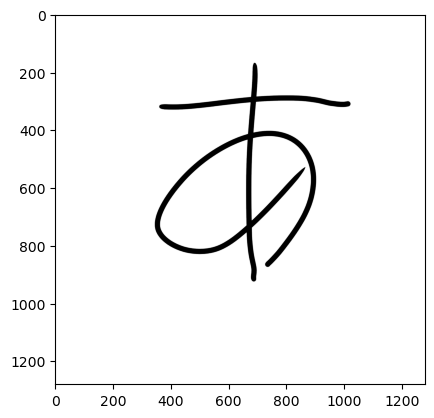

In [16]:
# converting image into strictly black-and-white
bw_image = image.convert("L") #L is 8-bit black-and-white image mode
plt.imshow(bw_image, cmap=plt.cm.Greys_r);

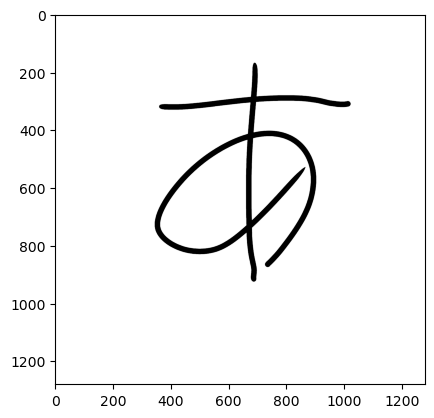

In [17]:
# enhancing image, can come back to this to see if performace improves
bw_image2 = ImageEnhance.Contrast(bw_image).enhance(2)
plt.imshow(bw_image2, cmap=plt.cm.Greys_r);

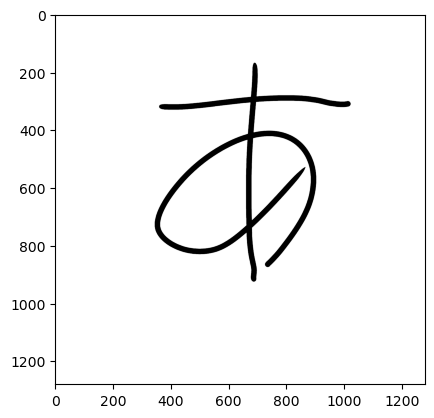

In [18]:
# seeing the image in black and white instead of the colorscale that matplotlib has as a default

plt.imshow(bw_image2, cmap=plt.cm.Greys_r);

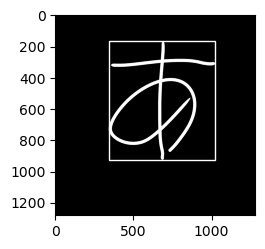

In [19]:
# recenter and resize image so all images are the same orientation

# Invert sample
inv_sample = ImageOps.invert(bw_image2)
bbox = inv_sample.getbbox()

fig = plt.figure(figsize=(2, 2))
ax = fig.add_axes([0,0,1,1])

ax.imshow(inv_sample, cmap=plt.cm.Greys_r)
rect = patches.Rectangle(
    (bbox[0], bbox[3]), bbox[2]-bbox[0], -bbox[3]+bbox[1]-1,
    fill=False, alpha=1, edgecolor='w')
ax.add_patch(rect)
plt.show()

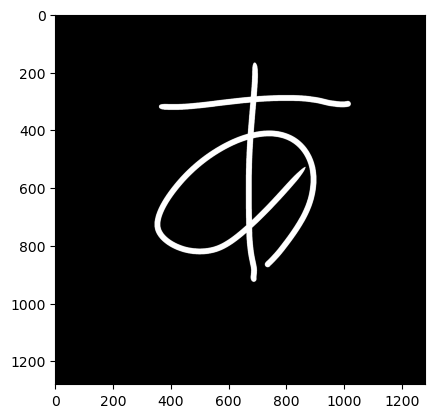

In [20]:
# inverted img
plt.imshow(inv_sample, cmap=plt.cm.Greys_r);

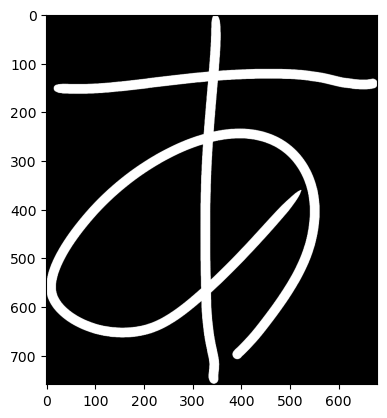

In [21]:
# cropped image before turning back into 28x28 image
crop = inv_sample.crop(bbox)
plt.imshow(crop, cmap=plt.cm.Greys_r);

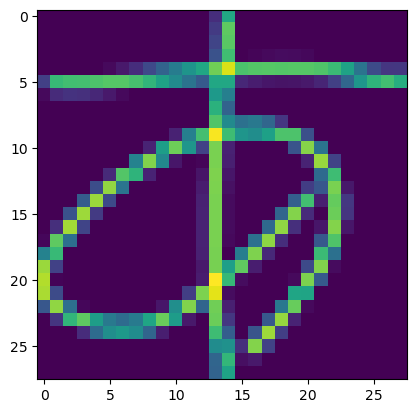

In [22]:
#Now resize down to a 28x28 image
resized_img = crop.resize((28,28))

plt.imshow(resized_img);

In [23]:
# after lowering resolution
print(f'Image details')
print(f'Format {resized_img.format}')
print(f'Size {resized_img.size}')
print(f'Mode {resized_img.mode}')

Image details
Format None
Size (28, 28)
Mode L


<a name='prepare3'></a>
## 3.B Preparing the Rest of the Dataset

In [24]:
# First for the self written dataset

resized_list_self = []
for image in df_self['image']: 
    bw_image = image.convert("L")
    bw_image2 = ImageEnhance.Contrast(bw_image).enhance(2)
    inv_sample = ImageOps.invert(bw_image2)
    bbox = inv_sample.getbbox()
    crop = inv_sample.crop(bbox)
    resized_img = crop.resize((28, 28))
    resized_list_self.append(resized_img)

In [25]:
# adding images to the dataset
df_self['resized_image'] = resized_list_self
df_self.head()

,label,image,resized_image,one_hot_label,numerical_image
0,a,<PIL.PngImagePlugin.PngImageFile image mode=RG...,<PIL.Image.Image image mode=L size=28x28 at 0x...,"[1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",None
1,a,<PIL.PngImagePlugin.PngImageFile image mode=RG...,<PIL.Image.Image image mode=L size=28x28 at 0x...,"[1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",None
2,a,<PIL.PngImagePlugin.PngImageFile image mode=RG...,<PIL.Image.Image image mode=L size=28x28 at 0x...,"[1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",None
3,a,<PIL.PngImagePlugin.PngImageFile image mode=RG...,<PIL.Image.Image image mode=L size=28x28 at 0x...,"[1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",None
4,a,<PIL.PngImagePlugin.PngImageFile image mode=RG...,<PIL.Image.Image image mode=L size=28x28 at 0x...,"[1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",None


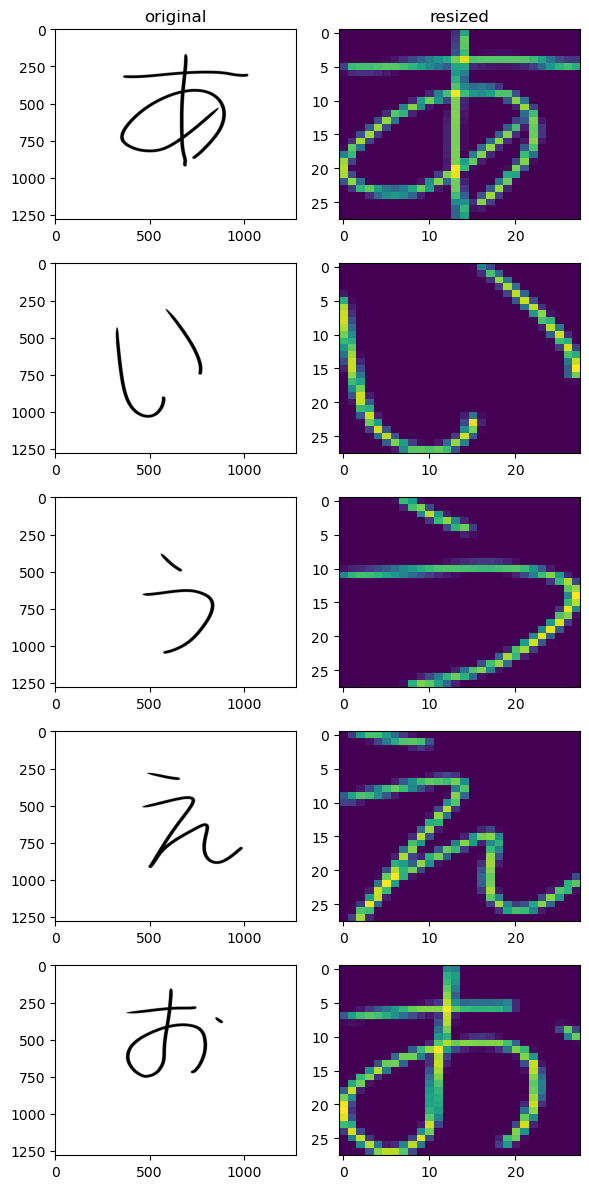

In [26]:
# comparing first 5 original characters to their edited versions
f, ax = plt.subplots(5, 2, figsize = (6, 12))       

ax[0, 0].set_title('original')
ax[0, 0].imshow(df_self['image'][0], aspect = 'auto')
ax[1, 0].imshow(df_self['image'][14], aspect = 'auto')
ax[2, 0].imshow(df_self['image'][14*2], aspect = 'auto')
ax[3, 0].imshow(df_self['image'][14*3], aspect = 'auto')
ax[4, 0].imshow(df_self['image'][14*4], aspect = 'auto')

ax[0, 1].set_title('resized')
ax[0, 1].imshow(df_self['resized_image'][0], aspect = 'auto')
ax[1, 1].imshow(df_self['resized_image'][14], aspect = 'auto')
ax[2, 1].imshow(df_self['resized_image'][14*2], aspect = 'auto')
ax[3, 1].imshow(df_self['resized_image'][14*3], aspect = 'auto')
ax[4, 1].imshow(df_self['resized_image'][14*4], aspect = 'auto')

plt.tight_layout()

In [27]:
# Now for the other written dataset
resized_list_other = []
for image in df_other['image']: 
    bw_image = image.convert("L")
    bw_image2 = ImageEnhance.Contrast(bw_image).enhance(2)
    inv_sample = ImageOps.invert(bw_image2)
    bbox = inv_sample.getbbox()
    crop = inv_sample.crop(bbox)
    resized_img = crop.resize((28, 28))
    resized_list_other.append(resized_img)

In [28]:
# adding images to the dataset
df_other['resized_image'] = resized_list_other
df_other.head()

,label,image,resized_image,one_hot_label,numerical_image
0,a,<PIL.PngImagePlugin.PngImageFile image mode=RG...,<PIL.Image.Image image mode=L size=28x28 at 0x...,"[1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",None
1,i,<PIL.PngImagePlugin.PngImageFile image mode=RG...,<PIL.Image.Image image mode=L size=28x28 at 0x...,"[0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",None
2,u,<PIL.PngImagePlugin.PngImageFile image mode=RG...,<PIL.Image.Image image mode=L size=28x28 at 0x...,"[0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",None
3,e,<PIL.PngImagePlugin.PngImageFile image mode=RG...,<PIL.Image.Image image mode=L size=28x28 at 0x...,"[0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",None
4,o,<PIL.PngImagePlugin.PngImageFile image mode=RG...,<PIL.Image.Image image mode=L size=28x28 at 0x...,"[0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, ...",None


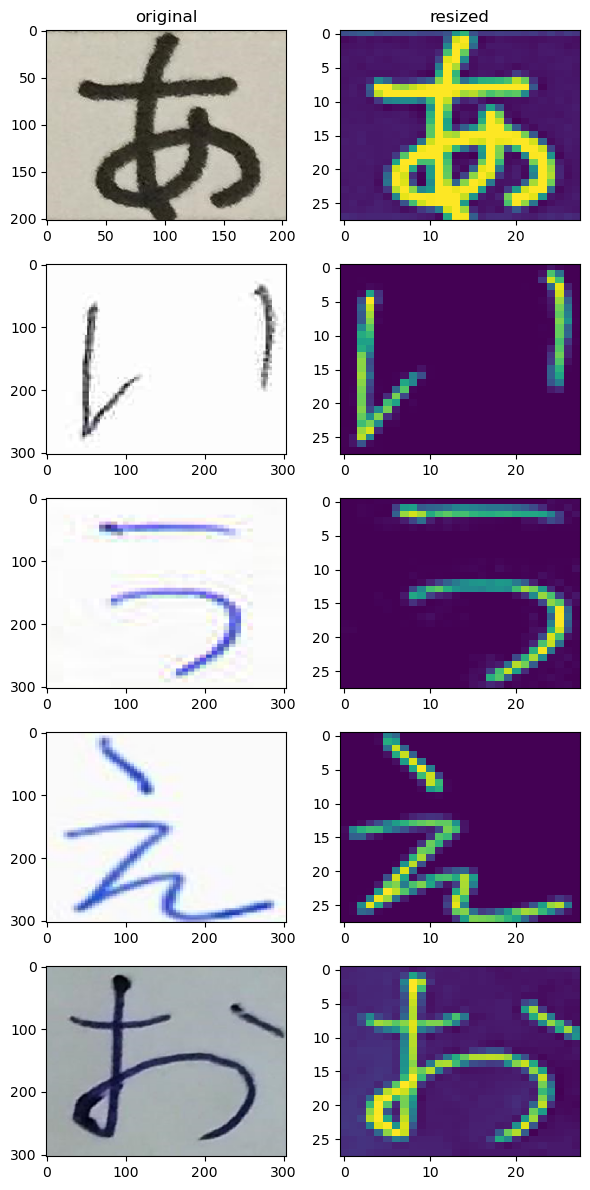

In [29]:
# comparing first 5 original characters to their edited versions
f, ax = plt.subplots(5, 2, figsize = (6, 12))       

ax[0, 0].set_title('original')
ax[0, 0].imshow(df_other['image'][0], aspect = 'auto')
ax[1, 0].imshow(df_other['image'][1*46 + 1], aspect = 'auto')
ax[2, 0].imshow(df_other['image'][2*46 + 2], aspect = 'auto')
ax[3, 0].imshow(df_other['image'][3*46 + 3], aspect = 'auto')
ax[4, 0].imshow(df_other['image'][4*46 + 4], aspect = 'auto')

ax[0, 1].set_title('resized')
ax[0, 1].imshow(df_other['resized_image'][0], aspect = 'auto')
ax[1, 1].imshow(df_other['resized_image'][1*46 + 1], aspect = 'auto')
ax[2, 1].imshow(df_other['resized_image'][2*46 + 2], aspect = 'auto')
ax[3, 1].imshow(df_other['resized_image'][3*46 + 3], aspect = 'auto')
ax[4, 1].imshow(df_other['resized_image'][4*46 + 4], aspect = 'auto')

plt.tight_layout()

<a name='prepare4'></a>
## 3.C Merging Datasets

In [30]:
df_joined = pd.concat([df_self, df_other], ignore_index=True)
df_joined.head()

,label,image,resized_image,one_hot_label,numerical_image
0,a,<PIL.PngImagePlugin.PngImageFile image mode=RG...,<PIL.Image.Image image mode=L size=28x28 at 0x...,"[1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",None
1,a,<PIL.PngImagePlugin.PngImageFile image mode=RG...,<PIL.Image.Image image mode=L size=28x28 at 0x...,"[1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",None
2,a,<PIL.PngImagePlugin.PngImageFile image mode=RG...,<PIL.Image.Image image mode=L size=28x28 at 0x...,"[1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",None
3,a,<PIL.PngImagePlugin.PngImageFile image mode=RG...,<PIL.Image.Image image mode=L size=28x28 at 0x...,"[1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",None
4,a,<PIL.PngImagePlugin.PngImageFile image mode=RG...,<PIL.Image.Image image mode=L size=28x28 at 0x...,"[1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",None


In [31]:
# shapes for each dataframe
df_self.shape, df_other.shape

((644, 5), (414, 5))

In [32]:
# shape for combined dataframe
df_joined.shape 

(1058, 5)

In [33]:
# should be 23 each
df_joined['label'].value_counts()

a      23
mo     23
ha     23
hi     23
fu     23
he     23
ho     23
ma     23
mi     23
mu     23
me     23
ya     23
i      23
yu     23
yo     23
ra     23
ri     23
ru     23
re     23
ro     23
wa     23
wo     23
no     23
ne     23
nu     23
ni     23
u      23
e      23
o      23
ka     23
ki     23
ku     23
ke     23
ko     23
sa     23
shi    23
su     23
se     23
so     23
ta     23
chi    23
tsu    23
te     23
to     23
na     23
n      23
Name: label, dtype: int64

<a name='#imagedata1'></a>
# 4. Converting Images into Numerical Data

In [34]:
# getting the numerical output for the image data
# the zeros stand for "empty" black background
# any number shows how white or filled in a pixel is (255 indicates fully white/filled in)

np.array(df_self['resized_image'][0].getdata())

array([  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
        30, 137,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,  39, 171,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,  47, 170,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,  57, 158,   0,   3,   6,   8,   7,
         5,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         6,  16,  30,  50,  73,  96, 118, 136, 179, 215, 163, 167, 168,
       167, 168, 168, 165, 155, 131,  88,  52,  36,  37,  43, 154, 159,
       160, 164, 168, 168, 162, 150, 131, 110,  87,  65, 137, 137,  25,
        18,  14,  12,  13,  16,  24,  43,  75, 120, 148, 159, 142,   6,
        28,  33,  32,  25,  16,   6,   0,   0,   0,   0,   0,   

In [35]:
# adding numerical Image data to dataframe
for i in range(len(df_joined)):
    df_joined.loc[i, 'numerical_image'] = df_joined['resized_image'][i].getdata()

In [36]:
df_joined.head()

,label,image,resized_image,one_hot_label,numerical_image
0,a,<PIL.PngImagePlugin.PngImageFile image mode=RG...,<PIL.Image.Image image mode=L size=28x28 at 0x...,"[1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","(0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 30, 13..."
1,a,<PIL.PngImagePlugin.PngImageFile image mode=RG...,<PIL.Image.Image image mode=L size=28x28 at 0x...,"[1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","(0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 100..."
2,a,<PIL.PngImagePlugin.PngImageFile image mode=RG...,<PIL.Image.Image image mode=L size=28x28 at 0x...,"[1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","(0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 73,..."
3,a,<PIL.PngImagePlugin.PngImageFile image mode=RG...,<PIL.Image.Image image mode=L size=28x28 at 0x...,"[1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","(0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 34, 97, 0..."
4,a,<PIL.PngImagePlugin.PngImageFile image mode=RG...,<PIL.Image.Image image mode=L size=28x28 at 0x...,"[1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","(0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."


<a name='eda1'></a>
# 5. Exploratory Data Analysis (EDA)

<a name='eda2'></a>
## 5.A Checking that every image has values in it (to ensure none are blank)

In [37]:
# finding average of each image's numerical data
# can consider an image blank if the average of values are well below a threshold

avg_list = []
for i in range(len(df_joined)):
    avg_list.append(np.average(df_joined.loc[i, 'numerical_image']))

# average of the average numerical count of each image (the average of how filled in each image is)   
np.average(avg_list)

39.06023952586706

In [38]:
# 3 images with lowest average image data
sorted(avg_list)[0:3]

[1.8035714285714286, 11.238520408163266, 11.681122448979592]

In [39]:
# now checking if any images are near or close to 0 (meaning they're basically empty)
threshold = 12.0
empty_list = []
for i in range(len(df_joined)):
    if np.average(df_joined.loc[i, 'numerical_image']) <= threshold:       
        empty_list.append(i)
        
empty_list

[735, 737, 763]

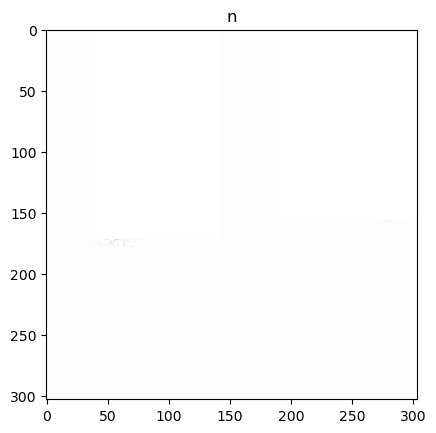

In [40]:
plt.title(str(df_joined.loc[735, 'label']))
plt.imshow(df_joined.loc[735, 'image']);

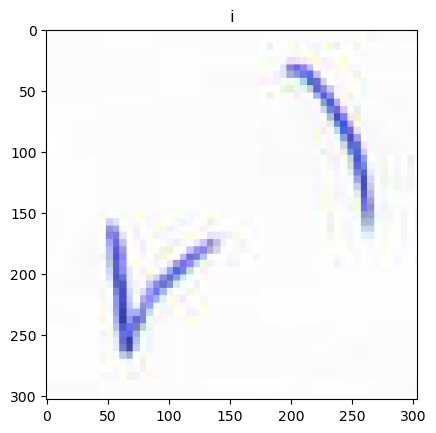

In [41]:
plt.title(str(df_joined.loc[737, 'label']))
plt.imshow(df_joined.loc[737, 'image']);

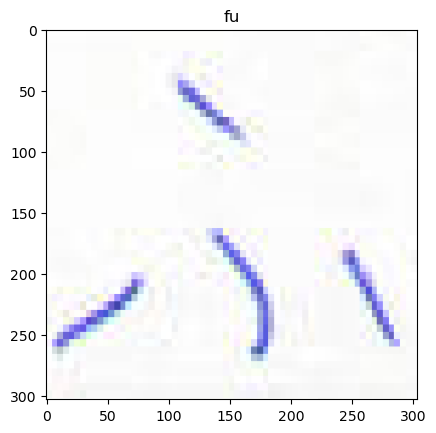

In [42]:
plt.title(str(df_joined.loc[763, 'label']))
plt.imshow(df_joined.loc[763, 'image']);

- Definitely an empty image
- Looking back at original images, this specific character was never drawn
- Can try to impute by averaging other images for that character (should be 9)

<a name='missing1'></a>
### 5.A.a Using Imputation for the empty character

In [43]:
empty_label = df_joined.loc[735, 'label']

# getting all images that match the label of the blank image
empty_df = df_joined.query(f"label == '{empty_label}'").drop(735, axis=0).reset_index(drop = True) 
empty_df

,label,image,resized_image,one_hot_label,numerical_image
0,n,<PIL.PngImagePlugin.PngImageFile image mode=RG...,<PIL.Image.Image image mode=L size=28x28 at 0x...,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","(0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 43, 43, 0, 0..."
1,n,<PIL.PngImagePlugin.PngImageFile image mode=RG...,<PIL.Image.Image image mode=L size=28x28 at 0x...,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","(0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 11, 138, 12,..."
2,n,<PIL.PngImagePlugin.PngImageFile image mode=RG...,<PIL.Image.Image image mode=L size=28x28 at 0x...,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","(0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 12, 14..."
3,n,<PIL.PngImagePlugin.PngImageFile image mode=RG...,<PIL.Image.Image image mode=L size=28x28 at 0x...,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","(0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 112, 54, 0, ..."
4,n,<PIL.PngImagePlugin.PngImageFile image mode=RG...,<PIL.Image.Image image mode=L size=28x28 at 0x...,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","(0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 122, 3..."
5,n,<PIL.PngImagePlugin.PngImageFile image mode=RG...,<PIL.Image.Image image mode=L size=28x28 at 0x...,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","(0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 130..."
6,n,<PIL.PngImagePlugin.PngImageFile image mode=RG...,<PIL.Image.Image image mode=L size=28x28 at 0x...,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","(0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 60,..."
7,n,<PIL.PngImagePlugin.PngImageFile image mode=RG...,<PIL.Image.Image image mode=L size=28x28 at 0x...,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","(0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 114..."
8,n,<PIL.PngImagePlugin.PngImageFile image mode=RG...,<PIL.Image.Image image mode=L size=28x28 at 0x...,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","(0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
9,n,<PIL.PngImagePlugin.PngImageFile image mode=RG...,<PIL.Image.Image image mode=L size=28x28 at 0x...,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","(0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."


In [44]:
# now to average all other images to create new image
impute_img = [0 for i in range(28*28)]
for i in range(len(empty_df)):
    img = np.array(empty_df.loc[i, 'numerical_image'])
    impute_img += img
    
impute_img = impute_img/len(empty_df)
impute_img

array([  9.90909091,   9.63636364,   9.72727273,   9.72727273,
         9.90909091,  10.09090909,  10.        ,   9.72727273,
        16.40909091,  35.86363636,  31.09090909,  25.95454545,
        21.81818182,  16.09090909,  31.5       ,  26.77272727,
        24.54545455,  27.68181818,  25.63636364,  17.77272727,
         9.68181818,   9.72727273,   9.86363636,   9.36363636,
         9.18181818,   9.31818182,   9.59090909,   9.31818182,
         9.90909091,   9.86363636,   9.77272727,   9.90909091,
        10.22727273,  14.68181818,  12.90909091,  10.        ,
        27.81818182,  55.90909091,  44.68181818,  42.86363636,
        25.45454545,  33.31818182,  43.77272727,  29.04545455,
        36.54545455,  35.09090909,  23.63636364,  12.27272727,
         9.72727273,   9.72727273,   9.54545455,   9.45454545,
         9.40909091,   9.59090909,   9.45454545,   9.40909091,
         9.90909091,   9.95454545,   9.81818182,  10.        ,
        10.40909091,  15.72727273,  14.40909091,  11.90

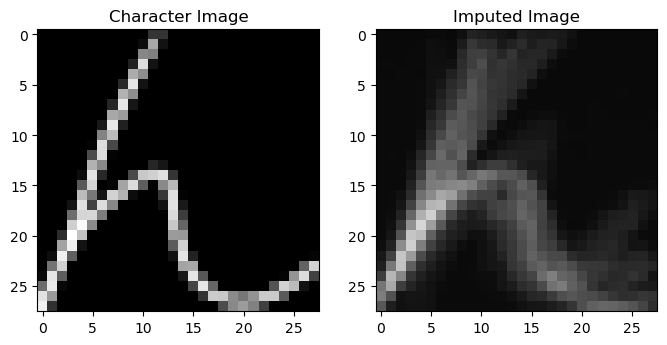

In [45]:
# showing the newly created image to see if it actually matches with the intended character
f, ax = plt.subplots(1, 2, figsize = (8, 16)) 

ax[0].set_title('Character Image')
ax[0].imshow(empty_df.loc[0, 'resized_image'], cmap = plt.cm.Greys_r)

img_array = []
for i in range(28):
    start = i*28
    end = (i+1)*28
    img_array.append(impute_img[start:end])
    
img_array = np.array(img_array)    
img = Image.fromarray(img_array)
ax[1].set_title('Imputed Image')
ax[1].imshow(img);

- That's definitely the correct character
- Doesn't look as solid as the other images, but probably better than a blank image

<a name='eda3'></a>
## 5.B Outlier Detection

<a name='outlier1'></a>
### 5.B.a Checking the average pixels within class (for each character)

In [46]:
avg_list = []
for i in range(len(df_joined)):
    avg_list.append(np.average(df_joined.loc[i, 'numerical_image']))


df_joined['image_data_avg'] = avg_list

In [47]:
df_joined.head()

,label,image,resized_image,one_hot_label,numerical_image,image_data_avg
0,a,<PIL.PngImagePlugin.PngImageFile image mode=RG...,<PIL.Image.Image image mode=L size=28x28 at 0x...,"[1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","(0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 30, 13...",31.959184
1,a,<PIL.PngImagePlugin.PngImageFile image mode=RG...,<PIL.Image.Image image mode=L size=28x28 at 0x...,"[1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","(0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 100...",28.142857
2,a,<PIL.PngImagePlugin.PngImageFile image mode=RG...,<PIL.Image.Image image mode=L size=28x28 at 0x...,"[1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","(0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 73,...",25.418367
3,a,<PIL.PngImagePlugin.PngImageFile image mode=RG...,<PIL.Image.Image image mode=L size=28x28 at 0x...,"[1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","(0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 34, 97, 0...",27.034439
4,a,<PIL.PngImagePlugin.PngImageFile image mode=RG...,<PIL.Image.Image image mode=L size=28x28 at 0x...,"[1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","(0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",27.931122


In [48]:
# changing to dict for ease of data entry
avg_dict = df_joined.groupby('label')['image_data_avg'].agg('mean').to_dict()
avg_dict

{'a': 41.807287045252885,
 'chi': 38.92840505767524,
 'e': 35.099101597160605,
 'fu': 26.00976042590949,
 'ha': 41.527229370008875,
 'he': 30.62749556344277,
 'hi': 37.901452972493345,
 'ho': 42.64374445430346,
 'i': 28.692380212954745,
 'ka': 34.935004436557236,
 'ke': 33.14890195208518,
 'ki': 41.34727151730257,
 'ko': 30.259871339840284,
 'ku': 27.37954747116238,
 'ma': 46.140028837622005,
 'me': 57.00737577639752,
 'mi': 42.97171694764862,
 'mo': 40.90716503992901,
 'mu': 38.794310115350484,
 'n': 36.04919032830524,
 'na': 40.3900842945874,
 'ne': 46.18583629103816,
 'ni': 33.59300133096717,
 'no': 51.286379769299025,
 'nu': 52.93933007985803,
 'o': 37.765417036379766,
 'ra': 38.34555235137533,
 're': 44.20812999112688,
 'ri': 36.96151286601597,
 'ro': 41.84838065661047,
 'ru': 48.46129103815439,
 'sa': 38.75282830523514,
 'se': 42.73219831410825,
 'shi': 29.263753327417927,
 'so': 44.26269964507542,
 'su': 34.19360026619343,
 'ta': 35.88220940550133,
 'te': 37.62538819875776,
 'to

In [49]:
# now the standard deviation
std_dict = df_joined.groupby('label')['image_data_avg'].agg('std').to_dict()
std_dict

{'a': 23.205844611897877,
 'chi': 21.03147569494922,
 'e': 17.2222902987063,
 'fu': 21.838881696977342,
 'ha': 23.040068736066306,
 'he': 23.266440613175938,
 'hi': 21.590907965415877,
 'ho': 23.583141962165293,
 'i': 22.489169757501458,
 'ka': 19.70527576399219,
 'ke': 19.12790253800961,
 'ki': 22.3757987816498,
 'ko': 17.524956057353428,
 'ku': 20.88096803324912,
 'ma': 24.667683859567685,
 'me': 18.456200102651042,
 'mi': 25.255180201278993,
 'mo': 23.89636934745232,
 'mu': 21.310499739169487,
 'n': 30.662060903100095,
 'na': 20.002114384547593,
 'ne': 20.15355809283184,
 'ni': 21.26688406513581,
 'no': 20.772976075278883,
 'nu': 21.80103504786276,
 'o': 17.544215291576425,
 'ra': 28.556433257763466,
 're': 23.566165593368478,
 'ri': 28.337927230457897,
 'ro': 23.723879501647293,
 'ru': 24.91687080690046,
 'sa': 20.400968249725352,
 'se': 20.380643404018723,
 'shi': 21.636449787631598,
 'so': 20.558513540709104,
 'su': 22.161270403015894,
 'ta': 19.463772979210653,
 'te': 20.2581665

In [50]:
# entering data into dataframe
df_joined['character_avg'] = 0
df_joined['character_std'] = 0
for i in range(len(df_joined)):
    label = df_joined.loc[i, 'label']
    df_joined.loc[i, 'character_avg'] = avg_dict[label]
    df_joined.loc[i, 'character_std'] = std_dict[label]
df_joined.head()

,label,image,resized_image,one_hot_label,numerical_image,image_data_avg,character_avg,character_std
0,a,<PIL.PngImagePlugin.PngImageFile image mode=RG...,<PIL.Image.Image image mode=L size=28x28 at 0x...,"[1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","(0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 30, 13...",31.959184,41.807287,23.205845
1,a,<PIL.PngImagePlugin.PngImageFile image mode=RG...,<PIL.Image.Image image mode=L size=28x28 at 0x...,"[1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","(0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 100...",28.142857,41.807287,23.205845
2,a,<PIL.PngImagePlugin.PngImageFile image mode=RG...,<PIL.Image.Image image mode=L size=28x28 at 0x...,"[1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","(0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 73,...",25.418367,41.807287,23.205845
3,a,<PIL.PngImagePlugin.PngImageFile image mode=RG...,<PIL.Image.Image image mode=L size=28x28 at 0x...,"[1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","(0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 34, 97, 0...",27.034439,41.807287,23.205845
4,a,<PIL.PngImagePlugin.PngImageFile image mode=RG...,<PIL.Image.Image image mode=L size=28x28 at 0x...,"[1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","(0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",27.931122,41.807287,23.205845


In [51]:
# now to test for any outliers
# an outlier could show incorrect label assignments, or incorrect image enhancement
# we'll be using the z-score and 2 standard deviations (95%) from the mean to determine an outlier
outlier_list = []
for i in range(len(df_joined)):
    x = df_joined.loc[i, 'image_data_avg']  
    mu = df_joined.loc[i, 'character_avg']
    sigma = df_joined.loc[i, 'character_std']
    z_score = (x-mu)/sigma
    if z_score <= -2.5 or z_score >= 2.5:
        outlier_list.append(i)
        
outlier_list

[676,
 829,
 830,
 831,
 832,
 833,
 835,
 836,
 837,
 839,
 840,
 845,
 847,
 849,
 855,
 870,
 920,
 921,
 942,
 944,
 1057]

In [52]:
df_outlier = df_joined.loc[outlier_list, :]
df_joined = df_joined.drop(outlier_list)

df_outlier

,label,image,resized_image,one_hot_label,numerical_image,image_data_avg,character_avg,character_std
676,mu,<PIL.PngImagePlugin.PngImageFile image mode=RG...,<PIL.Image.Image image mode=L size=28x28 at 0x...,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","(35, 37, 36, 32, 31, 29, 31, 33, 33, 33, 31, 3...",92.432398,38.794310,21.310500
829,i,<PIL.PngImagePlugin.PngImageFile image mode=RG...,<PIL.Image.Image image mode=L size=28x28 at 0x...,"[0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","(70, 71, 69, 67, 68, 69, 72, 70, 69, 67, 65, 6...",85.229592,28.692380,22.489170
830,u,<PIL.PngImagePlugin.PngImageFile image mode=RG...,<PIL.Image.Image image mode=L size=28x28 at 0x...,"[0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","(67, 68, 68, 69, 69, 68, 68, 68, 68, 69, 70, 7...",87.213010,31.634206,17.905926
831,e,<PIL.PngImagePlugin.PngImageFile image mode=RG...,<PIL.Image.Image image mode=L size=28x28 at 0x...,"[0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","(70, 72, 74, 75, 74, 76, 78, 76, 74, 72, 71, 6...",89.424745,35.099102,17.222290
832,o,<PIL.PngImagePlugin.PngImageFile image mode=RG...,<PIL.Image.Image image mode=L size=28x28 at 0x...,"[0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, ...","(69, 69, 72, 73, 72, 72, 73, 68, 60, 64, 67, 6...",90.002551,37.765417,17.544215
833,ka,<PIL.PngImagePlugin.PngImageFile image mode=RG...,<PIL.Image.Image image mode=L size=28x28 at 0x...,"[0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, ...","(66, 64, 62, 63, 63, 65, 65, 67, 66, 68, 69, 6...",84.775510,34.935004,19.705276
835,ku,<PIL.PngImagePlugin.PngImageFile image mode=RG...,<PIL.Image.Image image mode=L size=28x28 at 0x...,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, ...","(68, 65, 66, 67, 68, 65, 62, 66, 69, 71, 70, 7...",85.721939,27.379547,20.880968
836,ke,<PIL.PngImagePlugin.PngImageFile image mode=RG...,<PIL.Image.Image image mode=L size=28x28 at 0x...,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, ...","(70, 68, 67, 66, 64, 66, 68, 67, 66, 69, 69, 7...",88.283163,33.148902,19.127903
837,ko,<PIL.PngImagePlugin.PngImageFile image mode=RG...,<PIL.Image.Image image mode=L size=28x28 at 0x...,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","(86, 83, 83, 79, 80, 76, 78, 79, 77, 75, 72, 6...",85.716837,30.259871,17.524956
839,shi,<PIL.PngImagePlugin.PngImageFile image mode=RG...,<PIL.Image.Image image mode=L size=28x28 at 0x...,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","(78, 74, 73, 72, 71, 71, 70, 72, 73, 75, 75, 7...",84.563776,29.263753,21.636450


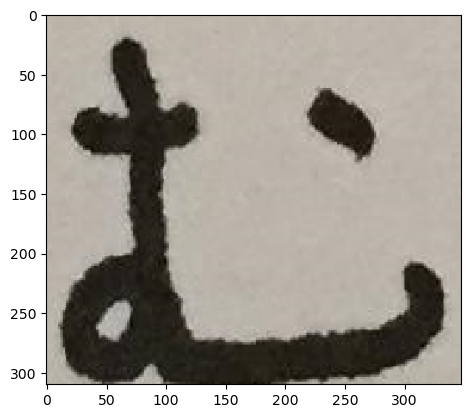

In [53]:
# checking first outlier image
plt.imshow(df_outlier.loc[outlier_list[0], 'image']);

- It looks like because the paper used was colored, it adds values to the background image of each character

<a name='outlier2'></a>
### 5.B.b Checking each image to ensure it was labeled correctly

In [54]:
# Setting up an iterator to quickly scan through all images
outlier_iter = iter(outlier_list)

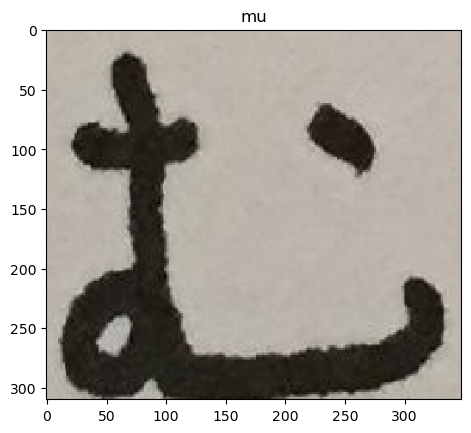

In [55]:
# checking each image to see if it was correctly labeled
k = next(outlier_iter)
label = df_outlier.loc[k, 'label']
plt.title(label)

plt.imshow(df_outlier.loc[k, 'image']);

- all images in the outlier list are correctly labeled
- Can keep raising the threshold of what pixels get set to zero

<a name='outlier3'></a>
### 5.B.c Setting the low level background values to zero

In [56]:
# testing on one character
outlier_img_data = df_outlier.loc[outlier_list[0], 'numerical_image']
#outlier_img_data = df_joined.loc[4, 'numerical_image']
test_array = np.array(outlier_img_data)
test_array[test_array < 100] = 0

test_array

array([  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0, 131, 248, 151,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0, 180, 255, 218,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0, 149,
       255, 243,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0, 253, 255, 140,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0, 209, 255, 181,   0,   0,   0,   0,   

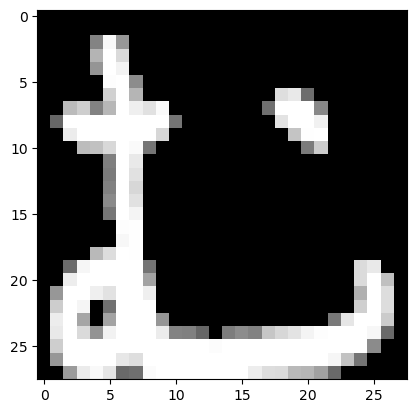

In [57]:
# reconstructing to check new image
img_list = []
for i in range(28):
    start = i*28
    end = (i+1)*28
    img_list.append(test_array[start:end])
    
img_array = np.array(img_list)    
img = Image.fromarray(img_array)
plt.imshow(img);

- Looks a lot better
- Can do this for every outlier character

In [58]:
# starting from a value of 10 and increasing until every image is removed from being an outlier
df_outlier_copy = df_outlier.copy()
outlier_list = df_outlier.index
for threshold in range(10, 200, 5):
    for i in outlier_list:
        outlier_img_data = df_outlier.loc[i, 'numerical_image']
        test_array = np.array(outlier_img_data)
        test_array[test_array < threshold] = 0
        df_outlier.at[i, 'numerical_image'] = test_array
        
    avg_list_outlier = []
    for i in df_outlier.index:
        avg_list_outlier.append(np.average(df_outlier.loc[i, 'numerical_image'])) 
    df_outlier['image_data_avg'] = avg_list_outlier

    outlier_list = []
    for i in df_outlier.index:
        x = df_outlier.loc[i, 'image_data_avg']  
        mu = df_outlier.loc[i, 'character_avg']
        sigma = df_outlier.loc[i, 'character_std']
        z_score = (x-mu)/sigma
        if z_score <= -1.0 or z_score >= 1.0:
            outlier_list.append(i)
            
    if len(outlier_list) == 0:
        break

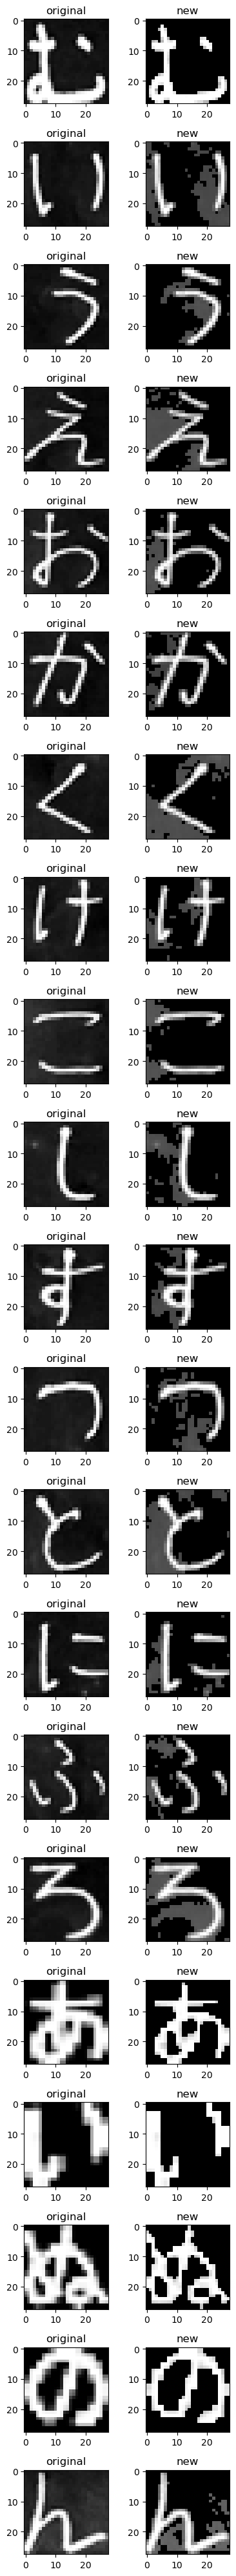

In [59]:
# spot checking new images against the originals
f, ax = plt.subplots(len(df_outlier), 2, figsize = (4, 40))      

np.random.seed(1)
#test_index = iter(np.random.choice(df_outlier.index, 10, replace = False))
test_index = iter(df_outlier.index)
for i in range(len(df_outlier.index)):
    img_index = next(test_index)
    
    ax[i, 0].set_title("original")
    ax[i, 0].imshow(df_outlier.loc[img_index, 'resized_image'], cmap=plt.cm.Greys_r)

    test_array = df_outlier.loc[img_index, 'numerical_image']
    img_list = []
    for j in range(28):
        start = j*28
        end = (j+1)*28
        img_list.append(test_array[start:end])
    
    img_array = np.array(img_list)    
    img = Image.fromarray(img_array)
    ax[i, 1].set_title("new")
    ax[i, 1].imshow(img)
    
plt.tight_layout();

- Everything is still readable
- There are obviously more pixels that could be brought down to zero, but I wanted to limit how much bias I'm asserting
- The goal was to just convert each image to prevent outliers

<a name='outlier4'></a>
### 5.B.d Merging the outlier Dataframe back into main Dataframe

In [60]:
df_joined = pd.concat([df_joined, df_outlier])
df_joined.head()

,label,image,resized_image,one_hot_label,numerical_image,image_data_avg,character_avg,character_std
0,a,<PIL.PngImagePlugin.PngImageFile image mode=RG...,<PIL.Image.Image image mode=L size=28x28 at 0x...,"[1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","(0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 30, 13...",31.959184,41.807287,23.205845
1,a,<PIL.PngImagePlugin.PngImageFile image mode=RG...,<PIL.Image.Image image mode=L size=28x28 at 0x...,"[1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","(0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 100...",28.142857,41.807287,23.205845
2,a,<PIL.PngImagePlugin.PngImageFile image mode=RG...,<PIL.Image.Image image mode=L size=28x28 at 0x...,"[1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","(0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 73,...",25.418367,41.807287,23.205845
3,a,<PIL.PngImagePlugin.PngImageFile image mode=RG...,<PIL.Image.Image image mode=L size=28x28 at 0x...,"[1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","(0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 34, 97, 0...",27.034439,41.807287,23.205845
4,a,<PIL.PngImagePlugin.PngImageFile image mode=RG...,<PIL.Image.Image image mode=L size=28x28 at 0x...,"[1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","(0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",27.931122,41.807287,23.205845


In [61]:
df_joined.shape

(1058, 8)

<a name='eda4'></a>
## 5.C Dividing the Image Data by 255

In [62]:
# This is done to keep all values between 0 and 1 for easier calculations
for i in range(len(df_joined)):
    image = df_joined.loc[i, 'numerical_image']
    df_joined.at[i, 'numerical_image'] = np.array(image).reshape(1, -1)/255
    
df_joined.loc[0, 'numerical_image']

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.11764706, 0.5372549 ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.15294118, 0.67058824, 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.18431373,
        0.66666667, 0.        , 0.        , 0.  

<a name='split1'></a>
# 6. Splitting Data

<a name='split2'></a>
## 6.A Train-test split

In [63]:
df_joined.head()

,label,image,resized_image,one_hot_label,numerical_image,image_data_avg,character_avg,character_std
0,a,<PIL.PngImagePlugin.PngImageFile image mode=RG...,<PIL.Image.Image image mode=L size=28x28 at 0x...,"[1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...",31.959184,41.807287,23.205845
1,a,<PIL.PngImagePlugin.PngImageFile image mode=RG...,<PIL.Image.Image image mode=L size=28x28 at 0x...,"[1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...",28.142857,41.807287,23.205845
2,a,<PIL.PngImagePlugin.PngImageFile image mode=RG...,<PIL.Image.Image image mode=L size=28x28 at 0x...,"[1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...",25.418367,41.807287,23.205845
3,a,<PIL.PngImagePlugin.PngImageFile image mode=RG...,<PIL.Image.Image image mode=L size=28x28 at 0x...,"[1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...",27.034439,41.807287,23.205845
4,a,<PIL.PngImagePlugin.PngImageFile image mode=RG...,<PIL.Image.Image image mode=L size=28x28 at 0x...,"[1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...",27.931122,41.807287,23.205845


In [64]:
df_joined.shape

(1058, 8)

In [65]:
# sorting values to keep common labels together
df_joined = df_joined.sort_values(by = ['label']).reset_index(drop=True)
df_joined.head()

,label,image,resized_image,one_hot_label,numerical_image,image_data_avg,character_avg,character_std
0,a,<PIL.PngImagePlugin.PngImageFile image mode=RG...,<PIL.Image.Image image mode=L size=28x28 at 0x...,"[1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...",31.959184,41.807287,23.205845
1,a,<PIL.PngImagePlugin.PngImageFile image mode=RG...,<PIL.Image.Image image mode=L size=28x28 at 0x...,"[1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...",35.186224,41.807287,23.205845
2,a,<PIL.PngImagePlugin.PngImageFile image mode=RG...,<PIL.Image.Image image mode=L size=28x28 at 0x...,"[1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[[0.0, 0.0, 0.0, 0.00392156862745098, 0.007843...",69.793367,41.807287,23.205845
3,a,<PIL.PngImagePlugin.PngImageFile image mode=RG...,<PIL.Image.Image image mode=L size=28x28 at 0x...,"[1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.27...",42.928571,41.807287,23.205845
4,a,<PIL.PngImagePlugin.PngImageFile image mode=RG...,<PIL.Image.Image image mode=L size=28x28 at 0x...,"[1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...",30.836735,41.807287,23.205845


In [66]:
# taking a random selection of each character for the training and testing sets
np.random.seed(1)

df_train = pd.DataFrame(columns = df_joined.columns)
df_test = pd.DataFrame(columns = df_joined.columns)

# adding random rows from each dataset into the training and test datasets
for i in range(len(df_joined['label'].unique())):
    
    # from the self dataframe
    index_array = np.random.choice(np.arange(23*i, 23*(i+1)), 23, replace=False)
    for j in index_array[:16]:
        df_train.loc[len(df_train), :] = df_joined.loc[j, :]
    for k in index_array[16:]:
        df_test.loc[len(df_test), :] = df_joined.loc[k, :]

In [67]:
# should be 16
df_train['label'].value_counts().mean()

16.0

In [68]:
# should be 7
df_test['label'].value_counts().mean()

7.0

In [69]:
# ensuring all images are accounted for
print("Train shape: " + str(df_train.shape) +
      "\nTest shape: " + str(df_test.shape))

Train shape: (736, 8)
Test shape: (322, 8)


<a name='split3'></a>
## 6.B Setting up Training Dataset for Cross Validation Later

In [70]:
# sorting by label to assign the values for
df_train = df_train.sort_values(by = 'label').reset_index(drop = True)
df_train

,label,image,resized_image,one_hot_label,numerical_image,image_data_avg,character_avg,character_std
0,a,<PIL.PngImagePlugin.PngImageFile image mode=RG...,<PIL.Image.Image image mode=L size=28x28 at 0x...,"[1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...",28.142857,41.807287,23.205845
1,a,<PIL.PngImagePlugin.PngImageFile image mode=RG...,<PIL.Image.Image image mode=L size=28x28 at 0x...,"[1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...",31.089286,41.807287,23.205845
2,a,<PIL.PngImagePlugin.PngImageFile image mode=RG...,<PIL.Image.Image image mode=L size=28x28 at 0x...,"[1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...",31.959184,41.807287,23.205845
3,a,<PIL.PngImagePlugin.PngImageFile image mode=RG...,<PIL.Image.Image image mode=L size=28x28 at 0x...,"[1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...",29.269133,41.807287,23.205845
4,a,<PIL.PngImagePlugin.PngImageFile image mode=RG...,<PIL.Image.Image image mode=L size=28x28 at 0x...,"[1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...",35.186224,41.807287,23.205845
...,...,...,...,...,...,...,...,...
731,yu,<PIL.PngImagePlugin.PngImageFile image mode=RG...,<PIL.Image.Image image mode=L size=28x28 at 0x...,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...",29.961735,44.725044,24.864326
732,yu,<PIL.PngImagePlugin.PngImageFile image mode=RG...,<PIL.Image.Image image mode=L size=28x28 at 0x...,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...",32.048469,44.725044,24.864326
733,yu,<PIL.PngImagePlugin.PngImageFile image mode=RG...,<PIL.Image.Image image mode=L size=28x28 at 0x...,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...",33.834184,44.725044,24.864326
734,yu,<PIL.PngImagePlugin.PngImageFile image mode=RG...,<PIL.Image.Image image mode=L size=28x28 at 0x...,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...",28.080357,44.725044,24.864326


In [71]:
# assigning each character to a set (16 sets of 46 characters each)
np.random.seed(1)

# number of sets of characters
group_count = df_train['label'].value_counts()[0]

assignment_array = np.empty(0) 
for i in range(len(df_train['label'].unique())):
    temp_array = np.random.choice(group_count, group_count, replace = False) + 1
    assignment_array = np.concatenate((assignment_array, temp_array))

# should be same length as df_train
len(assignment_array) == len(df_train), len(df_train)

(True, 736)

In [72]:
# adding the sets to the dataframe
df_train['loocv_set'] = assignment_array
df_train['loocv_set'].value_counts()

4.0     46
14.0    46
8.0     46
3.0     46
7.0     46
11.0    46
5.0     46
2.0     46
15.0    46
1.0     46
16.0    46
10.0    46
9.0     46
13.0    46
12.0    46
6.0     46
Name: loocv_set, dtype: int64

- The plan is to use 14 sets for training and 2 set for validation, 8 times
- This will be 8 fold cross validation

<a name='nn1'></a>
# 7. Basic Neural Network

<a name='nn2'></a>
## 7.A Finding Best Model (Grid Search)

In [73]:
### activation functions
np.seterr(all="ignore") # There will be overflow errors which I haven't figured out how to fix yet, so they're being ignored

def relu(x):
    return (x>=0)*x 
def relu2deriv(x):
    return x>=0 
def sig(x):
    return 1/(1 + np.exp(-x))
def sig2deriv(x):
    return x*(1-x)
def tanh(x):
    return np.tanh(x)
def tanh2deriv(x):
    return 1 - (x**2)
def softmax(x):    
    x = x - np.max(x)
    temp = np.exp(x)
    return temp/np.sum(temp, axis = 1, keepdims = True)

### hyper-parameters
alpha_range = [0.001, 0.01, 0.1, 2]
max_iterations = 200
max_hidden_size = 100
pixels_per_image = 28*28 
num_labels = len(df_train['label'].unique())

### information holders
info_list = []
info_dict = {}
file_num = 1 # number of csv files to keep hold of information as the process is running incase computer shuts down


### Neural Network Grid Search
for act_funct in ['relu', 'sig', 'tanh']:
    
    if act_funct == 'relu':
        act1 = relu
        act2 = relu2deriv
    elif act_funct == 'sig':
        act1 = sig
        act2 = sig2deriv
    elif act_funct == 'tanh':
        act1 = tanh
        act2 = tanh2deriv
    
    for alpha in alpha_range:  

        for hidden_size in range(40, max_hidden_size+1, 10):
            start_time = time.time() # for keeping track of each iteration


            iteration_num = max_iterations
            #iteration_num = 1 # for testing purposes

            best_train_error = []
            best_train_acc = []

            # weights
            np.random.seed(1)
            weights_0_1 = 0.2*np.random.random((pixels_per_image, hidden_size)) - 0.01 # randomized weight matrices to start the network
            weights_1_2 = 0.2*np.random.random((hidden_size, num_labels)) - 0.01    

            #information holders
            temp_error_list_train = []
            temp_acc_list_train = []

            # Training the network
            for j in range(iteration_num):
                train_error, train_correct_cnt = (0.0, 0) 

                for i in range(len(df_train)):
                    layer_0 = df_train.loc[i, 'numerical_image']                                                                            
                    layer_1 = act1(np.dot(layer_0, weights_0_1))

                    layer_2 = softmax(np.dot(layer_1, weights_1_2))

                    train_error += np.sum((df_train.loc[i, 'one_hot_label'] - layer_2)**2)
                    train_correct_cnt += int(np.argmax(layer_2) == np.argmax(df_train.loc[i, 'one_hot_label']))

                    layer_2_delta = df_train.loc[i, 'one_hot_label'] - layer_2
                    layer_1_delta = layer_2_delta.dot(weights_1_2.T) * act2(layer_1)                          

                    weights_0_1 += alpha * layer_0.T.dot(layer_1_delta)
                    weights_1_2 += alpha * layer_1.T.dot(layer_2_delta)


                temp_error_list_train.append(train_error/float(len(df_train)))
                temp_acc_list_train.append(train_correct_cnt/float(len(df_train)))                


            best_train_error.append(np.average(temp_error_list_train))
            best_train_acc.append(np.average(temp_acc_list_train))


            info_dict['activation_funct'] = act_funct
            info_dict['hidden_size'] = hidden_size
            info_dict['alpha'] = alpha
            info_dict['iterations'] = iteration_num
            info_dict['train_error'] = np.average(best_train_error)
            info_dict['train_accuracy'] =  np.average(best_train_acc)    

            info_list.append(info_dict)

            temp_df = pd.DataFrame(info_list)
            temp_df.to_csv(f'softmax_grid_search_csv_{file_num}.csv', index = False)

            print(f"Hidden layer amount {hidden_size} took {time.time() - start_time} seconds")
            print(info_dict)

            file_num += 1
            info_dict = {}

Hidden layer amount 40 took 19.885108947753906 seconds
{'activation_funct': 'relu', 'hidden_size': 40, 'alpha': 0.001, 'iterations': 200, 'train_error': 0.1418644191338532, 'train_accuracy': 0.9243410326086956}
Hidden layer amount 50 took 22.366366147994995 seconds
{'activation_funct': 'relu', 'hidden_size': 50, 'alpha': 0.001, 'iterations': 200, 'train_error': 0.13612886438223376, 'train_accuracy': 0.9238926630434782}
Hidden layer amount 60 took 24.591899156570435 seconds
{'activation_funct': 'relu', 'hidden_size': 60, 'alpha': 0.001, 'iterations': 200, 'train_error': 0.13402250786942993, 'train_accuracy': 0.9240013586956521}
Hidden layer amount 70 took 26.188624382019043 seconds
{'activation_funct': 'relu', 'hidden_size': 70, 'alpha': 0.001, 'iterations': 200, 'train_error': 0.13462388730393637, 'train_accuracy': 0.9221467391304347}
Hidden layer amount 80 took 28.645530939102173 seconds
{'activation_funct': 'relu', 'hidden_size': 80, 'alpha': 0.001, 'iterations': 200, 'train_error': 

Hidden layer amount 90 took 29.942224264144897 seconds
{'activation_funct': 'sig', 'hidden_size': 90, 'alpha': 0.01, 'iterations': 200, 'train_error': 0.5439003930714787, 'train_accuracy': 0.6259171195652173}
Hidden layer amount 100 took 31.60906410217285 seconds
{'activation_funct': 'sig', 'hidden_size': 100, 'alpha': 0.01, 'iterations': 200, 'train_error': 0.505418536584226, 'train_accuracy': 0.6861888586956522}
Hidden layer amount 40 took 20.08010697364807 seconds
{'activation_funct': 'sig', 'hidden_size': 40, 'alpha': 0.1, 'iterations': 200, 'train_error': 0.08438292538465453, 'train_accuracy': 0.9461209239130435}
Hidden layer amount 50 took 22.53175711631775 seconds
{'activation_funct': 'sig', 'hidden_size': 50, 'alpha': 0.1, 'iterations': 200, 'train_error': 0.08572417151705448, 'train_accuracy': 0.9578464673913044}
Hidden layer amount 60 took 24.561883687973022 seconds
{'activation_funct': 'sig', 'hidden_size': 60, 'alpha': 0.1, 'iterations': 200, 'train_error': 0.07773395975716

Hidden layer amount 70 took 25.727540016174316 seconds
{'activation_funct': 'tanh', 'hidden_size': 70, 'alpha': 2, 'iterations': 200, 'train_error': 0.16797215120896836, 'train_accuracy': 0.9153328804347828}
Hidden layer amount 80 took 27.47802472114563 seconds
{'activation_funct': 'tanh', 'hidden_size': 80, 'alpha': 2, 'iterations': 200, 'train_error': 0.14410808919219942, 'train_accuracy': 0.9276426630434784}
Hidden layer amount 90 took 29.387311697006226 seconds
{'activation_funct': 'tanh', 'hidden_size': 90, 'alpha': 2, 'iterations': 200, 'train_error': 0.16951849869845667, 'train_accuracy': 0.9147826086956523}
Hidden layer amount 100 took 31.137598037719727 seconds
{'activation_funct': 'tanh', 'hidden_size': 100, 'alpha': 2, 'iterations': 200, 'train_error': 0.17029937375125276, 'train_accuracy': 0.914375}


<a name='bm'></a>
## 7.A.a Picking Best Model (Highest Training Accuracy)

In [74]:
# saving info into dataframe and csv file
final_info_df = pd.read_csv('softmax_grid_search_csv_84.csv')
final_info_df.to_csv('final_info.csv', index = False)
final_info_df

,activation_funct,hidden_size,alpha,iterations,train_error,train_accuracy
0,relu,40,0.001,200,0.141864,0.924341
1,relu,50,0.001,200,0.136129,0.923893
2,relu,60,0.001,200,0.134023,0.924001
3,relu,70,0.001,200,0.134624,0.922147
4,relu,80,0.001,200,0.139292,0.919307
...,...,...,...,...,...,...
79,tanh,60,2.000,200,0.152900,0.923071
80,tanh,70,2.000,200,0.167972,0.915333
81,tanh,80,2.000,200,0.144108,0.927643
82,tanh,90,2.000,200,0.169518,0.914783


In [75]:
# sorting to check highest accuracy rating
# top 5 Relu functions
final_info_df[final_info_df['activation_funct'] == 'relu'].sort_values(by=['train_accuracy'], ascending=False).head()

,activation_funct,hidden_size,alpha,iterations,train_error,train_accuracy
13,relu,100,0.01,200,0.019749,0.991168
12,relu,90,0.01,200,0.020268,0.990890
10,relu,70,0.01,200,0.020809,0.990768
9,relu,60,0.01,200,0.021878,0.989864
11,relu,80,0.01,200,0.021952,0.989851


In [76]:
# top 5 Sigmoid functions
final_info_df[final_info_df['activation_funct'] == 'sig'].sort_values(by=['train_accuracy'], ascending=False).head()

,activation_funct,hidden_size,alpha,iterations,train_error,train_accuracy
47,sig,90,0.1,200,0.075267,0.959986
44,sig,60,0.1,200,0.077734,0.959823
48,sig,100,0.1,200,0.078685,0.958689
46,sig,80,0.1,200,0.078366,0.958444
45,sig,70,0.1,200,0.078097,0.958417


In [77]:
# top 5 Tanh functions
final_info_df[final_info_df['activation_funct'] == 'tanh'].sort_values(by=['train_accuracy'], ascending=False).head()

,activation_funct,hidden_size,alpha,iterations,train_error,train_accuracy
76,tanh,100,0.1,200,0.124834,0.9375
75,tanh,90,0.1,200,0.124706,0.9375
74,tanh,80,0.1,200,0.124729,0.9375
73,tanh,70,0.1,200,0.125662,0.9375
72,tanh,60,0.1,200,0.132050,0.9375


- The best performing model was with a relu activation function, hidden size of 100 and an alpha of 0.01
- The Training accuracy is 99.12%
- This model can be improved more with more hyperparameter tuning as well as using dropout
- In general Relu performed better overall

<a name='nn3'></a>
## 7.B Working with the best model to try to improve accuracy

In [78]:
# Taking Parameters of the best model
best_model = final_info_df.sort_values(by=['train_accuracy'], ascending=False).head(1).reset_index(drop=True)
best_act_funct = best_model['activation_funct'][0]
best_hidden_size = best_model['hidden_size'][0]
best_alpha = best_model['alpha'][0]

In [79]:
# hyper-parameters
alpha = best_alpha
iteration_num = 500
hidden_size = best_hidden_size
pixels_per_image = 28*28 
num_labels = len(df_train['label'].unique())

# activation functions
def relu(x):
    return (x>=0)*x 
def relu2deriv(x):
    return x>=0 
def sig(x):
    return 1/(1 + np.exp(-x))
def sig2deriv(x):
    return x*(1-x)
def tanh(x):
    return np.tanh(x)
def tanh2deriv(x):
    return 1 - (x**2)
def softmax(x):    
    x = x - np.max(x)
    temp = np.exp(x)
    return temp/np.sum(temp, axis = 1, keepdims = True)

if best_act_funct == 'relu':
    act1 = relu 
    act2 = relu2deriv
elif best_act_funct == 'sigmoid':
    act1 = sig
    act2 = sig2deriv
elif best_act_funct == 'tanh':
    act1 = tanh
    act2 = tanh2deriv

# information holders
best_train_acc = []
best_val_acc = []

# 8 fold Cross Validation
for set_num in range(1, len(df_train['loocv_set'].unique())+1, 2):
    set_num_1 = set_num
    set_num_2 = set_num + 1
    validation_set_1 = df_train[df_train['loocv_set'] == set_num]
    validation_set_2 = df_train[df_train['loocv_set'] == set_num_2] 
    validation_set = pd.concat([validation_set_1, validation_set_2])
    validation_index = validation_set.index
    
    validation_set = validation_set.reset_index(drop = True)
    training_set = df_train.drop(validation_index).reset_index(drop = True)

    # weights
    np.random.seed(1)
    weights_0_1 = 0.2*np.random.random((pixels_per_image, hidden_size)) - 0.1 # randomized weight matrices to start the network
    weights_1_2 = 0.2*np.random.random((hidden_size, num_labels)) - 0.1    

    #information holders
    temp_error_list_train = []
    temp_acc_list_train = []

    temp_error_list_val = []
    temp_acc_list_val = []

    # Training the network
    for j in range(iteration_num):
        train_error, train_correct_cnt = (0.0, 0) 

        for i in range(len(training_set)):
            layer_0 = training_set.loc[i, 'numerical_image']
            if np.inf in layer_0 or np.isnan(layer_0).any():
                print('\nlayer_0 is the problem')
                ddddd
            
            layer_1 = act1(np.dot(layer_0, weights_0_1))
            if np.inf in layer_1 or np.isnan(layer_1).any():
                print('\nlayer_1 is the problem')
                ddddd
            
            
            if np.inf in np.dot(layer_1, weights_1_2) or np.isnan(np.dot(layer_1, weights_1_2)).any():
                print(f'\nRight before softmax is the problem (before layer 2), set_num: {set_num}, iter: {j}, image_num: {i}')
                ddddd
            layer_2 = softmax(np.dot(layer_1, weights_1_2))
            if np.inf in layer_2 or np.isnan(layer_2).any():
                print('\nlayer_2 is the problem')
                ddddd
            
            train_error += np.sum((training_set.loc[i, 'one_hot_label'] - layer_2)**2)
            train_correct_cnt += int(np.argmax(layer_2) == np.argmax(training_set.loc[i, 'one_hot_label']))

            layer_2_delta = training_set.loc[i, 'one_hot_label'] - layer_2
            layer_1_delta = layer_2_delta.dot(weights_1_2.T) * act2(layer_1)
            
            weights_0_1 += alpha * layer_0.T.dot(layer_1_delta) 
            weights_1_2 += alpha * layer_1.T.dot(layer_2_delta)
                                       

        # only prints out every 10 iterations
        # using validation values to monitor overfitting
        valid_error, valid_correct_cnt = (0.0, 0)
        if (j%10 == 0 or j == iteration_num-1):

            for i in range(len(validation_set)):
                layer_0 = validation_set.loc[i, 'numerical_image']
                layer_1 = relu(np.dot(layer_0, weights_0_1))
                layer_2 = softmax(np.dot(layer_1, weights_1_2))

                valid_error += np.sum((validation_set.loc[i, 'one_hot_label'] - layer_2) ** 2)
                valid_correct_cnt += int(np.argmax(layer_2) == np.argmax(validation_set.loc[i, 'one_hot_label']))

            sys.stdout.write("\n" + 
                         " Iteration: " + str(j) + 
                         " Train-Err: " + str(train_error/float(len(training_set)))[0:5] + 
                         " Train-Acc: " + str(train_correct_cnt/float(len(training_set)))[0:5] +
                        " Validation-Err: " + str(valid_error/float(len(validation_set)))[0:5] + 
                        " Validation-Acc: " + str(valid_correct_cnt/float(len(validation_set)))[0:5])

            
            temp_acc_list_train.append(train_correct_cnt/float(len(training_set)))                
            temp_acc_list_val.append(valid_correct_cnt/float(len(validation_set)))

    
    best_train_acc.append(temp_acc_list_train)
    best_val_acc.append(temp_acc_list_val)


 Iteration: 0 Train-Err: 0.938 Train-Acc: 0.226 Validation-Err: 0.972 Validation-Acc: 0.141
 Iteration: 10 Train-Err: 0.119 Train-Acc: 0.958 Validation-Err: 0.407 Validation-Acc: 0.706
 Iteration: 20 Train-Err: 0.011 Train-Acc: 0.998 Validation-Err: 0.321 Validation-Acc: 0.75
 Iteration: 30 Train-Err: 0.003 Train-Acc: 0.998 Validation-Err: 0.311 Validation-Acc: 0.760
 Iteration: 40 Train-Err: 0.002 Train-Acc: 0.998 Validation-Err: 0.309 Validation-Acc: 0.771
 Iteration: 50 Train-Err: 0.001 Train-Acc: 0.998 Validation-Err: 0.309 Validation-Acc: 0.771
 Iteration: 60 Train-Err: 0.001 Train-Acc: 0.998 Validation-Err: 0.309 Validation-Acc: 0.771
 Iteration: 70 Train-Err: 0.001 Train-Acc: 0.998 Validation-Err: 0.309 Validation-Acc: 0.771
 Iteration: 80 Train-Err: 0.001 Train-Acc: 0.998 Validation-Err: 0.310 Validation-Acc: 0.782
 Iteration: 90 Train-Err: 0.001 Train-Acc: 0.998 Validation-Err: 0.310 Validation-Acc: 0.793
 Iteration: 100 Train-Err: 0.001 Train-Acc: 0.998 Validation-Err: 0.310

 Iteration: 230 Train-Err: 0.001 Train-Acc: 1.0 Validation-Err: 0.309 Validation-Acc: 0.760
 Iteration: 240 Train-Err: 0.001 Train-Acc: 1.0 Validation-Err: 0.310 Validation-Acc: 0.760
 Iteration: 250 Train-Err: 0.001 Train-Acc: 1.0 Validation-Err: 0.310 Validation-Acc: 0.760
 Iteration: 260 Train-Err: 0.001 Train-Acc: 1.0 Validation-Err: 0.310 Validation-Acc: 0.760
 Iteration: 270 Train-Err: 0.001 Train-Acc: 1.0 Validation-Err: 0.310 Validation-Acc: 0.760
 Iteration: 280 Train-Err: 0.001 Train-Acc: 1.0 Validation-Err: 0.310 Validation-Acc: 0.760
 Iteration: 290 Train-Err: 0.001 Train-Acc: 1.0 Validation-Err: 0.310 Validation-Acc: 0.760
 Iteration: 300 Train-Err: 0.001 Train-Acc: 1.0 Validation-Err: 0.310 Validation-Acc: 0.760
 Iteration: 310 Train-Err: 0.001 Train-Acc: 1.0 Validation-Err: 0.310 Validation-Acc: 0.760
 Iteration: 320 Train-Err: 0.001 Train-Acc: 1.0 Validation-Err: 0.310 Validation-Acc: 0.760
 Iteration: 330 Train-Err: 0.001 Train-Acc: 1.0 Validation-Err: 0.311 Validation

 Iteration: 480 Train-Err: 0.001 Train-Acc: 1.0 Validation-Err: 0.402 Validation-Acc: 0.739
 Iteration: 490 Train-Err: 0.001 Train-Acc: 1.0 Validation-Err: 0.402 Validation-Acc: 0.739
 Iteration: 499 Train-Err: 0.001 Train-Acc: 1.0 Validation-Err: 0.402 Validation-Acc: 0.739
 Iteration: 0 Train-Err: 0.937 Train-Acc: 0.225 Validation-Err: 0.969 Validation-Acc: 0.119
 Iteration: 10 Train-Err: 0.114 Train-Acc: 0.959 Validation-Err: 0.476 Validation-Acc: 0.663
 Iteration: 20 Train-Err: 0.011 Train-Acc: 0.998 Validation-Err: 0.372 Validation-Acc: 0.739
 Iteration: 30 Train-Err: 0.003 Train-Acc: 0.998 Validation-Err: 0.358 Validation-Acc: 0.739
 Iteration: 40 Train-Err: 0.002 Train-Acc: 0.998 Validation-Err: 0.351 Validation-Acc: 0.739
 Iteration: 50 Train-Err: 0.001 Train-Acc: 0.998 Validation-Err: 0.347 Validation-Acc: 0.75
 Iteration: 60 Train-Err: 0.001 Train-Acc: 0.998 Validation-Err: 0.344 Validation-Acc: 0.771
 Iteration: 70 Train-Err: 0.001 Train-Acc: 0.998 Validation-Err: 0.343 Vali

<a name='nngraph1'></a>
### 7.B.b Best Model Graph Results

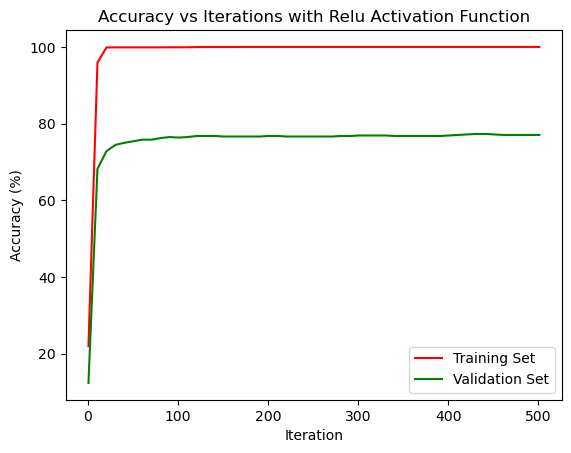

In [80]:
#graphing results Relu

training_plot_points = np.average(best_train_acc, axis = 0)*100
validation_plot_points = np.average(best_val_acc, axis = 0)*100
hidden_count = range(1, 511, 10)

plt.plot(hidden_count, training_plot_points, 'r', label='Training Set')
plt.plot(hidden_count, validation_plot_points, 'g', label='Validation Set')

plt.title("Accuracy vs Iterations with Relu Activation Function")
plt.xlabel("Iteration")
plt.ylabel("Accuracy (%)")

plt.legend()
plt.show()

In [81]:
# Iteration that had the highest accuracy
max_index = np.argmax(validation_plot_points)
max_index, validation_plot_points[max_index]

(43, 77.30978260869564)

<a name='nn4'></a>
## 7.C Neural Network with Dropout

In [82]:
# now with dropout

# hyper-parameters
alpha = best_alpha
iteration_num = 500
hidden_size = best_hidden_size
pixels_per_image = 28*28 
num_labels = len(df_train['label'].unique())

# activation functions
def relu(x):
    return (x>=0)*x 
def relu2deriv(x):
    return x>=0 
def sig(x):
    return 1/(1 + np.exp(-x))
def sig2deriv(x):
    return x*(1-x)
def tanh(x):
    return np.tanh(x)
def tanh2deriv(x):
    return 1 - (x**2)
def softmax(x):    
    x = x - np.max(x)
    temp = np.exp(x)
    return temp/np.sum(temp, axis = 1, keepdims = True)

if best_act_funct == 'relu':
    act1 = relu 
    act2 = relu2deriv
elif best_act_funct == 'sigmoid':
    act1 = sig
    act2 = sig2deriv
elif best_act_funct == 'tanh':
    act1 = tanh
    act2 = tanh2deriv

# information holders
dropout_best_train_acc = []
dropout_best_val_acc = []

# Leave One Out Cross Validation
for set_num in range(1, len(df_train['loocv_set'].unique())+1, 2):
    set_num_1 = set_num
    set_num_2 = set_num + 1
    validation_set_1 = df_train[df_train['loocv_set'] == set_num]
    validation_set_2 = df_train[df_train['loocv_set'] == set_num_2] 
    validation_set = pd.concat([validation_set_1, validation_set_2])
    validation_index = validation_set.index
    
    validation_set = validation_set.reset_index(drop = True)
    training_set = df_train.drop(validation_index).reset_index(drop = True)

    # weights
    np.random.seed(1)
    weights_0_1 = 0.2*np.random.random((pixels_per_image, hidden_size)) - 0.1 # randomized weight matrices to start the network
    weights_1_2 = 0.2*np.random.random((hidden_size, num_labels)) - 0.1    

    #information holders
    temp_error_list_train = []
    temp_acc_list_train = []

    temp_error_list_val = []
    temp_acc_list_val = []

    # Training the network
    for j in range(iteration_num):
        train_error, train_correct_cnt = (0.0, 0) 

        for i in range(len(training_set)):
            layer_0 = training_set.loc[i, 'numerical_image']                                                                            
            layer_1 = relu(np.dot(layer_0, weights_0_1))
            dropout_mask = np.random.randint(2, size = layer_1.shape)
            layer_1 *= dropout_mask*2
            layer_2 = softmax(np.dot(layer_1, weights_1_2))

            train_error += np.sum((training_set.loc[i, 'one_hot_label'] - layer_2)**2)
            train_correct_cnt += int(np.argmax(layer_2) == np.argmax(training_set.loc[i, 'one_hot_label']))

            layer_2_delta = training_set.loc[i, 'one_hot_label'] - layer_2
            layer_1_delta = layer_2_delta.dot(weights_1_2.T) * relu2deriv(layer_1)                          
            layer_1_delta *= dropout_mask
            
            weights_1_2 += alpha * layer_1.T.dot(layer_2_delta)
            weights_0_1 += alpha * layer_0.T.dot(layer_1_delta)


        # only prints out every 10 iterations
        # using validation values to monitor overfitting
        
        if (j%10 == 0 or j == iteration_num-1):
            valid_error, valid_correct_cnt = (0.0, 0)
            for i in range(len(validation_set)):
                layer_0 = validation_set.loc[i, 'numerical_image']
                layer_1 = relu(np.dot(layer_0, weights_0_1))
                layer_2 = np.dot(layer_1, weights_1_2)

                valid_error += np.sum((validation_set.loc[i, 'one_hot_label'] - layer_2) ** 2)
                valid_correct_cnt += int(np.argmax(layer_2) == np.argmax(validation_set.loc[i, 'one_hot_label']))

            sys.stdout.write("\n" + 
                         " Iteration: " + str(j) + 
                         " Train-Err: " + str(train_error/float(len(training_set)))[0:5] + 
                         " Train-Acc: " + str(train_correct_cnt/float(len(training_set)))[0:5] +
                        " Validation-Err: " + str(valid_error/float(len(validation_set)))[0:5] + 
                        " Validation-Acc: " + str(valid_correct_cnt/float(len(validation_set)))[0:5])

            
            temp_acc_list_train.append(train_correct_cnt/float(len(training_set)))                
            temp_acc_list_val.append(valid_correct_cnt/float(len(validation_set)))

    
    dropout_best_train_acc.append(temp_acc_list_train)
    dropout_best_val_acc.append(temp_acc_list_val)


 Iteration: 0 Train-Err: 0.964 Train-Acc: 0.116 Validation-Err: 3.373 Validation-Acc: 0.108
 Iteration: 10 Train-Err: 0.600 Train-Acc: 0.590 Validation-Err: 62.31 Validation-Acc: 0.641
 Iteration: 20 Train-Err: 0.525 Train-Acc: 0.597 Validation-Err: 130.3 Validation-Acc: 0.652
 Iteration: 30 Train-Err: 0.526 Train-Acc: 0.597 Validation-Err: 260.4 Validation-Acc: 0.608
 Iteration: 40 Train-Err: 0.578 Train-Acc: 0.520 Validation-Err: 411.2 Validation-Acc: 0.554
 Iteration: 50 Train-Err: 0.590 Train-Acc: 0.513 Validation-Err: 637.7 Validation-Acc: 0.532
 Iteration: 60 Train-Err: 0.591 Train-Acc: 0.509 Validation-Err: 1064. Validation-Acc: 0.532
 Iteration: 70 Train-Err: 0.682 Train-Acc: 0.431 Validation-Err: 1411. Validation-Acc: 0.510
 Iteration: 80 Train-Err: 0.692 Train-Acc: 0.434 Validation-Err: 2191. Validation-Acc: 0.467
 Iteration: 90 Train-Err: 0.694 Train-Acc: 0.433 Validation-Err: 2986. Validation-Acc: 0.478
 Iteration: 100 Train-Err: 0.731 Train-Acc: 0.416 Validation-Err: 3706

 Iteration: 210 Train-Err: 0.904 Train-Acc: 0.332 Validation-Err: 54677 Validation-Acc: 0.282
 Iteration: 220 Train-Err: 0.930 Train-Acc: 0.304 Validation-Err: 65666 Validation-Acc: 0.336
 Iteration: 230 Train-Err: 0.884 Train-Acc: 0.321 Validation-Err: 76894 Validation-Acc: 0.326
 Iteration: 240 Train-Err: 0.923 Train-Acc: 0.295 Validation-Err: 90194 Validation-Acc: 0.358
 Iteration: 250 Train-Err: 0.903 Train-Acc: 0.287 Validation-Err: 10923 Validation-Acc: 0.282
 Iteration: 260 Train-Err: 0.900 Train-Acc: 0.302 Validation-Err: 13546 Validation-Acc: 0.304
 Iteration: 270 Train-Err: 0.902 Train-Acc: 0.301 Validation-Err: 17519 Validation-Acc: 0.282
 Iteration: 280 Train-Err: 0.921 Train-Acc: 0.291 Validation-Err: 20801 Validation-Acc: 0.293
 Iteration: 290 Train-Err: 0.925 Train-Acc: 0.284 Validation-Err: 26718 Validation-Acc: 0.282
 Iteration: 300 Train-Err: 0.904 Train-Acc: 0.298 Validation-Err: 31594 Validation-Acc: 0.336
 Iteration: 310 Train-Err: 0.892 Train-Acc: 0.290 Validation

 Iteration: 420 Train-Err: 0.847 Train-Acc: 0.304 Validation-Err: 38808 Validation-Acc: 0.239
 Iteration: 430 Train-Err: 0.908 Train-Acc: 0.263 Validation-Err: 45286 Validation-Acc: 0.260
 Iteration: 440 Train-Err: 0.892 Train-Acc: 0.268 Validation-Err: 49726 Validation-Acc: 0.25
 Iteration: 450 Train-Err: 0.917 Train-Acc: 0.256 Validation-Err: 55308 Validation-Acc: 0.271
 Iteration: 460 Train-Err: 0.911 Train-Acc: 0.254 Validation-Err: 69598 Validation-Acc: 0.271
 Iteration: 470 Train-Err: 0.924 Train-Acc: 0.234 Validation-Err: 78093 Validation-Acc: 0.271
 Iteration: 480 Train-Err: 0.903 Train-Acc: 0.251 Validation-Err: 95225 Validation-Acc: 0.25
 Iteration: 490 Train-Err: 0.888 Train-Acc: 0.248 Validation-Err: 10682 Validation-Acc: 0.239
 Iteration: 499 Train-Err: 0.929 Train-Acc: 0.248 Validation-Err: 12619 Validation-Acc: 0.228
 Iteration: 0 Train-Err: 0.966 Train-Acc: 0.121 Validation-Err: 3.708 Validation-Acc: 0.097
 Iteration: 10 Train-Err: 0.571 Train-Acc: 0.610 Validation-Err:

<a name='nngraph2'></a>
### 7.C.a Dropout Graphs

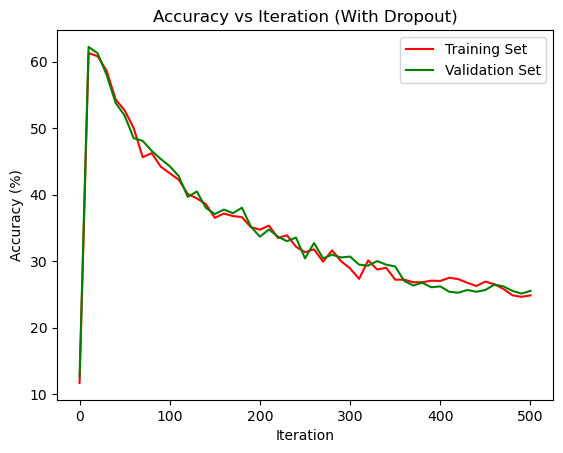

In [83]:
#graphing results

dropout_training_plot_points = np.average(dropout_best_train_acc, axis = 0)*100
dropout_validation_plot_points = np.average(dropout_best_val_acc, axis = 0)*100
hidden_count = range(0, 501, 10)

plt.plot(hidden_count, dropout_training_plot_points, 'r', label='Training Set')
plt.plot(hidden_count, dropout_validation_plot_points, 'g', label='Validation Set')

plt.title("Accuracy vs Iteration (With Dropout)")
plt.xlabel("Iteration")
plt.ylabel("Accuracy (%)")

plt.legend()
plt.show()

In [84]:
# Iteration that had the highest accuracy
max_index_drop = np.argmax(dropout_validation_plot_points)
max_index_drop, dropout_validation_plot_points[max_index]

(1, 25.679347826086957)

- It doesn't look like dropout is the best solution
- The highest accuracy is the first iteration, and then it decreases from there.

<a name='nn5'></a>
## 7.D. Using model on Test data (With Early Stopping)

In [85]:
# hyper-parameters
alpha = best_alpha
iteration_num = 100
hidden_size = best_hidden_size
pixels_per_image = 28*28 
num_labels = len(df_train['label'].unique())

# activation functions
def relu(x):
    return (x>=0)*x 
def relu2deriv(x):
    return x>=0 
def sig(x):
    return 1/(1 + np.exp(-x))
def sig2deriv(x):
    return x*(1-x)
def tanh(x):
    return np.tanh(x)
def tanh2deriv(x):
    return 1 - (x**2)
def softmax(x):    
    x = x - np.max(x)
    temp = np.exp(x)
    return temp/np.sum(temp, axis = 1, keepdims = True)

if best_act_funct == 'relu':
    act1 = relu 
    act2 = relu2deriv
elif best_act_funct == 'sigmoid':
    act1 = sig
    act2 = sig2deriv
elif best_act_funct == 'tanh':
    act1 = tanh
    act2 = tanh2deriv

# information holders
best_train_acc = []
best_test_acc = []

# Leave One Out Cross Validation
for set_num in range(1):
    
    test_set = df_test # actually test data but kept same for ease of use
    training_set = df_train

    # weights
    np.random.seed(1)
    weights_0_1 = 0.2*np.random.random((pixels_per_image, hidden_size)) - 0.1 # randomized weight matrices to start the network
    weights_1_2 = 0.2*np.random.random((hidden_size, num_labels)) - 0.1    

    #information holders
    temp_error_list_train = []
    temp_acc_list_train = []

    temp_error_list_test = []
    temp_acc_list_test = []

    # Training the network
    for j in range(iteration_num):
        train_error, train_correct_cnt = (0.0, 0) 

        for i in range(len(training_set)):
            layer_0 = training_set.loc[i, 'numerical_image']                                                                            
            layer_1 = relu(np.dot(layer_0, weights_0_1))
            
            layer_2 = softmax(np.dot(layer_1, weights_1_2))

            train_error += np.sum((training_set.loc[i, 'one_hot_label'] - layer_2)**2)
            train_correct_cnt += int(np.argmax(layer_2) == np.argmax(training_set.loc[i, 'one_hot_label']))

            layer_2_delta = training_set.loc[i, 'one_hot_label'] - layer_2
            layer_1_delta = layer_2_delta.dot(weights_1_2.T) * relu2deriv(layer_1)                          
                  
            weights_1_2 += alpha * layer_1.T.dot(layer_2_delta)
            weights_0_1 += alpha * layer_0.T.dot(layer_1_delta) 


        # only prints out every 10 iterations
        # using validation values to monitor overfitting
        
        if (j%5 == 0 or j == iteration_num-1):
            test_error, test_correct_cnt = (0.0, 0)
            for i in range(len(test_set)):
                layer_0 = test_set.loc[i, 'numerical_image']
                layer_1 = relu(np.dot(layer_0, weights_0_1))
                layer_2 = softmax(np.dot(layer_1, weights_1_2))

                test_error += np.sum((test_set.loc[i, 'one_hot_label'] - layer_2) ** 2)
                test_correct_cnt += int(np.argmax(layer_2) == np.argmax(test_set.loc[i, 'one_hot_label']))

            sys.stdout.write("\n" + 
                         " Iteration: " + str(j) + 
                         " Train-Err: " + str(train_error/float(len(training_set)))[0:5] + 
                         " Train-Acc: " + str(train_correct_cnt/float(len(training_set)))[0:5] +
                        " Test-Err: " + str(test_error/float(len(test_set)))[0:5] + 
                        " Test-Acc: " + str(test_correct_cnt/float(len(test_set)))[0:5])

            
            temp_acc_list_train.append(train_correct_cnt/float(len(training_set)))                
            temp_acc_list_test.append(test_correct_cnt/float(len(test_set)))

    
    best_train_acc.append(temp_acc_list_train)
    best_test_acc.append(temp_acc_list_test)


 Iteration: 0 Train-Err: 0.921 Train-Acc: 0.270 Test-Err: 0.971 Test-Acc: 0.111
 Iteration: 5 Train-Err: 0.350 Train-Acc: 0.816 Test-Err: 0.631 Test-Acc: 0.531
 Iteration: 10 Train-Err: 0.104 Train-Acc: 0.957 Test-Err: 0.420 Test-Acc: 0.695
 Iteration: 15 Train-Err: 0.034 Train-Acc: 0.989 Test-Err: 0.353 Test-Acc: 0.773
 Iteration: 20 Train-Err: 0.010 Train-Acc: 0.998 Test-Err: 0.336 Test-Acc: 0.773
 Iteration: 25 Train-Err: 0.004 Train-Acc: 0.998 Test-Err: 0.330 Test-Acc: 0.773
 Iteration: 30 Train-Err: 0.002 Train-Acc: 0.998 Test-Err: 0.328 Test-Acc: 0.779
 Iteration: 35 Train-Err: 0.002 Train-Acc: 0.998 Test-Err: 0.326 Test-Acc: 0.773
 Iteration: 40 Train-Err: 0.001 Train-Acc: 0.998 Test-Err: 0.326 Test-Acc: 0.773
 Iteration: 45 Train-Err: 0.001 Train-Acc: 0.998 Test-Err: 0.325 Test-Acc: 0.773
 Iteration: 50 Train-Err: 0.001 Train-Acc: 0.998 Test-Err: 0.325 Test-Acc: 0.770
 Iteration: 55 Train-Err: 0.001 Train-Acc: 0.998 Test-Err: 0.325 Test-Acc: 0.770
 Iteration: 60 Train-Err: 0.0

<a name='nngraph3'></a>
### 7.D.a Graphing Final Results

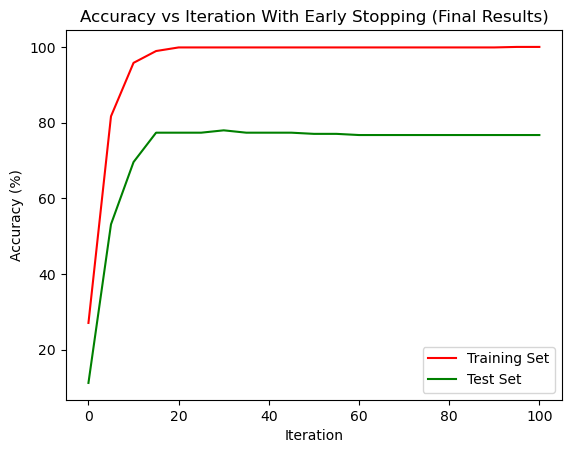

In [86]:
#graphing results

training_plot_points = np.average(best_train_acc, axis = 0)*100
test_plot_points = np.average(best_test_acc, axis = 0)*100
hidden_count = range(0, 101, 5)

plt.plot(hidden_count, training_plot_points, 'r', label='Training Set')
plt.plot(hidden_count, test_plot_points, 'g', label='Test Set')

plt.title("Accuracy vs Iteration With Early Stopping (Final Results)")
plt.xlabel("Iteration")
plt.ylabel("Accuracy (%)")

plt.legend()
plt.show()

In [87]:
print(f"Training Accuracy: {str(best_train_acc[0][-1])[0:5]}, Test Accuracy: {str(best_test_acc[0][-1])[0:5]}" )

Training Accuracy: 1.0, Test Accuracy: 0.767


<a name='conc1'></a>
# 8. Conclusions

1. Definite signs of overfitting, since training accuracy was 100% while test accuracy was only 76.7%.
2. While 76.7% is decent, there are ways to increase test accuracy
3. Dropout was really underwhelming. While it did technically reduce overfitting, accuracy drastically decreased. There could be ways to improve accuracy with dropout, I'm currently unfamiliar with it.
4. Early Stopping seemed a good fit, since the validation accuracy peaked at an iteration <100. This is shown again with the test set. 
4. Stocastic Gradient Descent might be taking too much processing speed. I could look into Batch Gradient Descent in order to cut down the time for each iteration.

<a name='conc2'></a>
## 8.A Problems

1. Accuracy could be higher
2. Massive overflow errors when using Softmax and Sigmoid activation functions, so results might be better if those were usable.
3. Dataset being too small could've affected accuracy
4. Too much of the dataset is drawn by myself. If dataset is expanded and more different character sets are collected, accuracy could improve.
5. Running of the Neural Network too a long time each iteration. There should be a way to increase efficiency, especially during the Grid Search process.

<a name='next'></a>
# 9. What Next?

1. Retry this project with a Convolutional Neural Network.
2. Test out the model used in the MNIST project onto this project, and see how it compares to my model.
3. Test out my model onto the MNIST project and see how they compare.
4. Expand dataset.
5. Start collecting data on Kanji to expand this project.
6. Create a website for quick use and automatic training of the model.